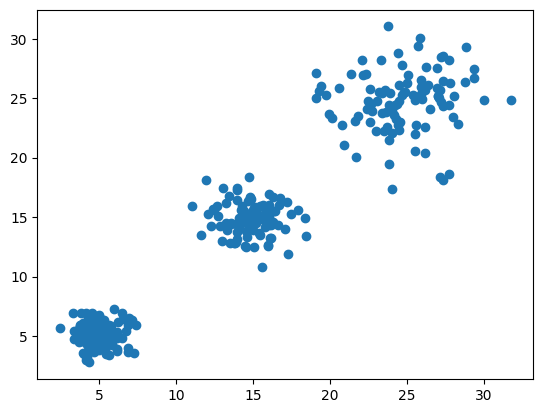

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Create synthetic data with three round clusters
np.random.seed(0)
cluster1 = np.random.normal(loc=5, scale=1, size=(100,2))
cluster2 = np.random.normal(loc=15, scale=1.5, size=(100,2))
cluster3 = np.random.normal(loc=25, scale=2.5, size=(100,2))
X = np.concatenate((cluster1, cluster2, cluster3))

plt.scatter(X[:, 0], X[:, 1])


In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the Euclidean distance between points
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2, axis=1))

# K-means function
def k_means(X, k=4, max_iterations=100):
    # Step 1: Initialize centroids randomly from the dataset
    indices = np.random.choice(X.shape[0], size=k, replace=False)
    centroids = X[indices]

    # For convergence check, track centroid changes
    centroids_old = np.zeros(centroids.shape)
    
    # To store the assignment of each point to a cluster
    labels = np.zeros(X.shape[0], dtype=int)

    # Repeat Steps 2 and 3 until centroids do not change or we reach max_iterations
    for iteration in range(max_iterations):
        # Step 2: Assign points to the nearest centroid
        for i, point in enumerate(X):
            distances = euclidean_distance(point, centroids)
            cluster_index = np.argmin(distances)
            labels[i] = cluster_index

        # Keeping a copy of the old centroids for convergence check
        centroids_old = centroids.copy()

        # Step 3: Recalculate centroids
        for i in range(k):
            points_in_cluster = X[labels == i]
            if points_in_cluster.size:
                centroids[i] = points_in_cluster.mean(axis=0)

        # Check for convergence (if centroids do not change)
        if np.all(centroids == centroids_old):
            break

    return centroids, labels




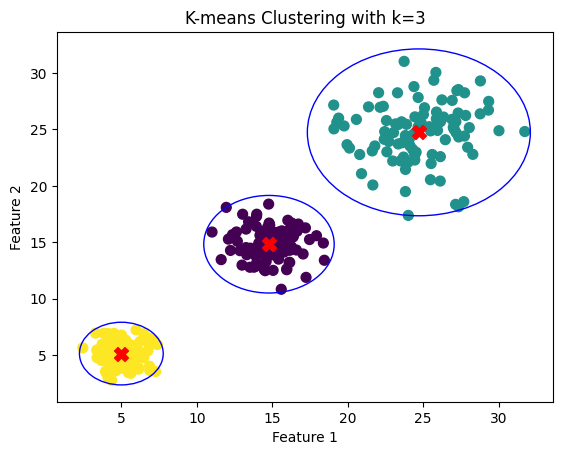

In [43]:
import matplotlib.pyplot as plt
from scipy.spatial import distance

centroids, labels = k_means(X, k=3)

# Assuming 'X', 'labels', and 'centroids' are already defined and calculated from your k-means function

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100)  # Make centroids more visible

# Draw a circle around each cluster
for i in range(centroids.shape[0]):  # Use centroids.shape[0] to adapt to the number of clusters
    cluster_points = X[labels == i]
    if len(cluster_points) > 0:  # Check if there are points in the cluster
        radius = max(distance.cdist(cluster_points, [centroids[i]], 'euclidean'))
        circle = plt.Circle(centroids[i], radius, color='b', fill=False)
        plt.gca().add_patch(circle)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'K-means Clustering with k={centroids.shape[0]}')
plt.show()
